### Types of Restuarants around the Perth Metropolitan Area

In [1]:
#dependencies et al.
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
import numpy as np
import scipy.stats as st
import time

#api_keys
import api_keys


In [40]:
# Bring in Summary Dataframe "socio_demographic_restuarant_data.csv"
load_csv = "../Outputs/socio_demographic_restuarant_data.csv"
summary_df = pd.read_csv(load_csv)
summary_df.head()

,Postcode,Suburb,Suburb sqkm,Median House Price,Median Age (Persons),Median Mortgage Repayments (Monthly),Median Total Personal Income (Weekly),Median Rent (Weekly),Median Total Family Income (Weekly),Average Number of Persons per Bedroom,...,Number of Restuarants,Minimum Rating,Maximum Rating,Average Rating of Restuarants,Total Number of Reviews,Average Number of Reviews,Minimum Price Level,Maximum Price Level,Average Price Level,Restuarant Density
0,6064,Alexander Heights,3.1816,453285,37,1800,625,390,1704,0.8,...,20,4.1,4.1,0.205,120,6.00,9,0,0.00,6.286145
1,6154,Alfred Cove,1.0566,840087,39,2420,852,443,2542,0.8,...,20,4.1,4.6,0.870,1103,55.15,2,2,0.30,18.928639
2,6038,Alkimos,17.1744,413750,28,2249,930,360,2094,0.7,...,20,3.5,4.5,0.590,3448,172.40,2,3,0.25,1.164524
3,6167,Anketell,6.8220,1008763,45,1733,641,420,1958,0.8,...,20,3.8,4.7,1.925,5375,268.75,2,3,0.95,2.931692
4,6153,Applecross,3.1954,1376690,43,2916,954,460,2764,0.7,...,20,4.0,4.8,0.855,1221,61.05,2,2,0.30,6.258997


In [3]:
# Check the list of Column
list(summary_df.columns.values)

['Postcode',
 'Suburb',
 'Suburb sqkm',
 'Median House Price',
 'Median Age (Persons)',
 'Median Mortgage Repayments (Monthly)',
 'Median Total Personal Income (Weekly)',
 'Median Rent (Weekly)',
 'Median Total Family Income (Weekly)',
 'Average Number of Persons per Bedroom',
 'Median Total Household Income (Weekly)',
 'Average Household Size',
 'People (0-14 year)',
 'People (15-24 year)',
 'People (25-34 year)',
 'People (35-44 year)',
 'People (45-54 year)',
 'People (55-64 year)',
 'People (65-74 year)',
 'People (75-84 year)',
 'People (85 and over year)',
 'Total Number of People',
 'Unemployment Rate (%)',
 'Number of Restuarants',
 'Minimum Rating',
 'Maximum Rating',
 'Average Rating of Restuarants',
 'Total Number of Reviews',
 'Average Number of Reviews',
 'Minimum Price Level',
 'Maximum Price Level',
 'Average Price Level',
 'Restuarant Density']

The r-value is: 0.29.


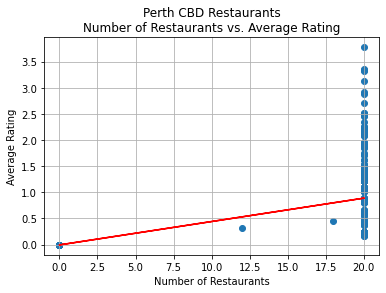

In [4]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Number of Restuarants"], summary_df["Average Rating of Restuarants"])
regress_values = summary_df["Number of Restuarants"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(summary_df["Number of Restuarants"], summary_df["Average Rating of Restuarants"])
plt.plot(summary_df["Number of Restuarants"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nNumber of Restaurants vs. Average Rating")
plt.xlabel("Number of Restaurants")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/num_restaurant_vs_mean_rating.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.12.


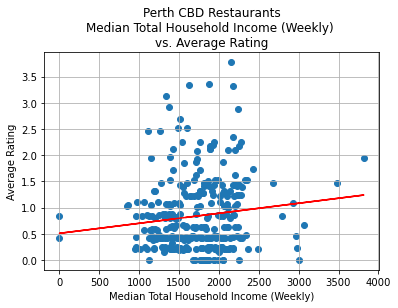

In [5]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Rating of Restuarants"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Rating of Restuarants"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) \nvs. Average Rating")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_mean_rating.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.13.


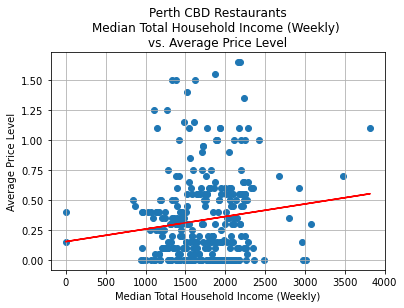

In [6]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Price Level"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Average Price Level"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) \nvs. Average Price Level")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Average Price Level")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_mean_price_level.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.88.


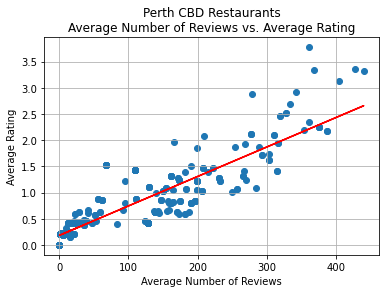

In [7]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Average Number of Reviews"], summary_df["Average Rating of Restuarants"])
regress_values = summary_df["Average Number of Reviews"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(summary_df["Average Number of Reviews"], summary_df["Average Rating of Restuarants"])
plt.plot(summary_df["Average Number of Reviews"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nAverage Number of Reviews vs. Average Rating")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/mean_num_review_vs_mean_rating.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: -0.09.


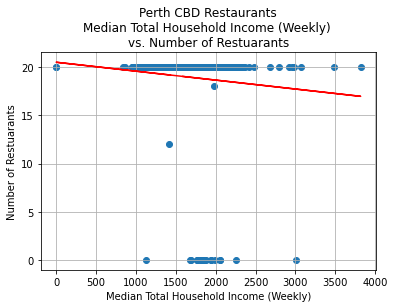

In [8]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Number of Restuarants"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Number of Restuarants"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) \nvs. Number of Restuarants")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Number of Restuarants")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_num_restaurant.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.17.


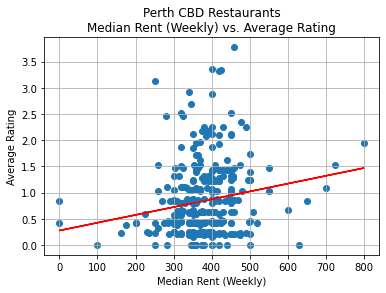

In [9]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Rent (Weekly)"], summary_df["Average Rating of Restuarants"])
regress_values = summary_df["Median Rent (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(summary_df["Median Rent (Weekly)"], summary_df["Average Rating of Restuarants"])
plt.plot(summary_df["Median Rent (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Rent (Weekly) vs. Average Rating")
plt.xlabel("Median Rent (Weekly)")
plt.ylabel("Average Rating")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/mean_rent_vs_mean_rating.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.73.


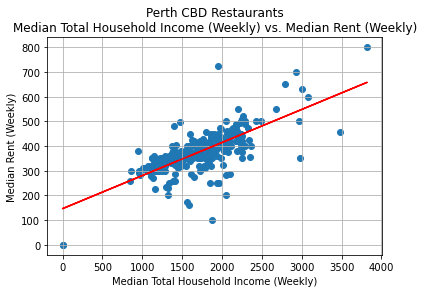

In [10]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Total Household Income (Weekly)"], summary_df["Median Rent (Weekly)"])
regress_values = summary_df["Median Total Household Income (Weekly)"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(summary_df["Median Total Household Income (Weekly)"], summary_df["Median Rent (Weekly)"])
plt.plot(summary_df["Median Total Household Income (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Total Household Income (Weekly) vs. Median Rent (Weekly)")
plt.xlabel("Median Total Household Income (Weekly)")
plt.ylabel("Median Rent (Weekly)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/median_house_income_vs_median_rent.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.1.


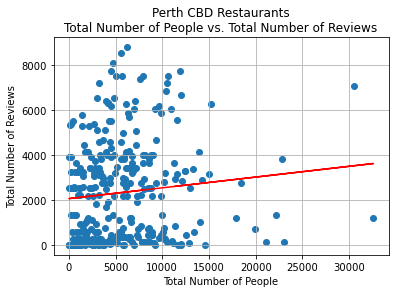

In [21]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Total Number of People"], summary_df["Total Number of Reviews"])
regress_values = summary_df["Total Number of People"] * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

# Create the plot
plt.scatter(summary_df["Total Number of People"], summary_df["Total Number of Reviews"])
plt.plot(summary_df["Total Number of People"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nTotal Number of People vs. Total Number of Reviews")
plt.xlabel("Total Number of People")
plt.ylabel("Total Number of Reviews")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/num_people_vs_num_review.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.17.


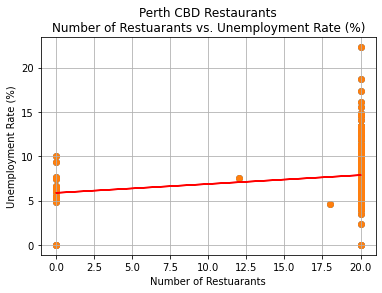

In [23]:
# Linear regression
plt.scatter(summary_df["Number of Restuarants"], summary_df["Unemployment Rate (%)"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Number of Restuarants"], summary_df["Unemployment Rate (%)"])
regress_values = summary_df['Number of Restuarants'] * slope + intercept

# Create the plot
plt.scatter(summary_df["Number of Restuarants"], summary_df["Unemployment Rate (%)"])
plt.plot(summary_df["Number of Restuarants"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nNumber of Restuarants vs. Unemployment Rate (%)")
plt.xlabel("Number of Restuarants")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Number of Restuarants vsUnemployment Rate (%).png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.02.


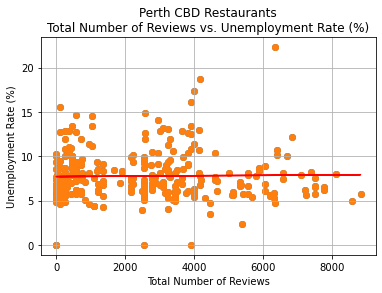

In [24]:
# Linear regression
plt.scatter(summary_df["Total Number of Reviews"], summary_df["Unemployment Rate (%)"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Total Number of Reviews"], summary_df["Unemployment Rate (%)"])
regress_values = summary_df['Total Number of Reviews'] * slope + intercept

# Create the plot
plt.scatter(summary_df["Total Number of Reviews"], summary_df["Unemployment Rate (%)"])
plt.plot(summary_df["Total Number of Reviews"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nTotal Number of Reviews vs. Unemployment Rate (%)")
plt.xlabel("Total Number of Reviews")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Total Number of Reviews vs Unemployment Rate (%).png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: -0.24.


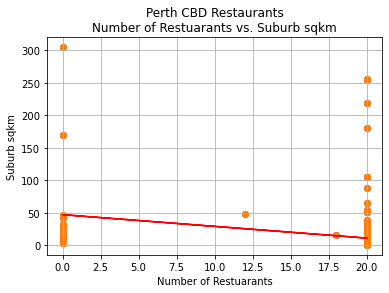

In [27]:
# Linear regression
plt.scatter(summary_df["Number of Restuarants"], summary_df["Suburb sqkm"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Number of Restuarants"], summary_df["Suburb sqkm"])
regress_values = summary_df['Number of Restuarants'] * slope + intercept

# Create the plot
plt.scatter(summary_df["Number of Restuarants"], summary_df["Suburb sqkm"])
plt.plot(summary_df["Number of Restuarants"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nNumber of Restuarants vs. Suburb sqkm")
plt.xlabel("Number of Restuarants")
plt.ylabel("Suburb sqkm")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Number of Restuarants vs Suburb sqkm.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: -0.37.


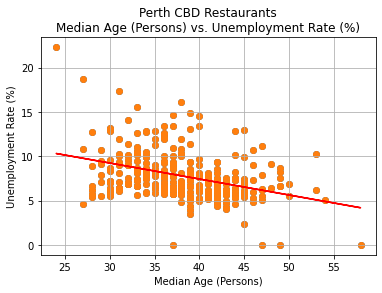

In [37]:
# Linear regression
plt.scatter(summary_df["Median Age (Persons)"], summary_df["Unemployment Rate (%)"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Age (Persons)"], summary_df["Unemployment Rate (%)"])
regress_values = summary_df['Median Age (Persons)'] * slope + intercept

# Create the plot
plt.scatter(summary_df["Median Age (Persons)"], summary_df["Unemployment Rate (%)"])
plt.plot(summary_df["Median Age (Persons)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Age (Persons) vs. Unemployment Rate (%)")
plt.xlabel("Median Age (Persons)")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Median Age (Persons) vs Unemployment Rate (%).png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: -0.23.


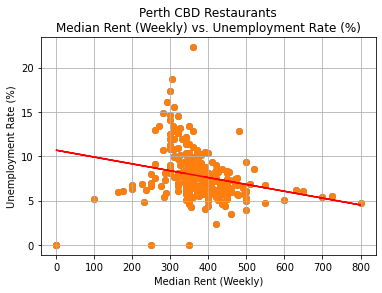

In [47]:
# Linear regression
plt.scatter(summary_df["Median Rent (Weekly)"], summary_df["Unemployment Rate (%)"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Rent (Weekly)"], summary_df["Unemployment Rate (%)"])
regress_values = summary_df['Median Rent (Weekly)'] * slope + intercept

# Create the plot
plt.scatter(summary_df["Median Rent (Weekly)"], summary_df["Unemployment Rate (%)"])
plt.plot(summary_df["Median Rent (Weekly)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Rent (Weekly) vs. Unemployment Rate (%)")
plt.xlabel("Median Rent (Weekly)")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Median Rent (Weekly) vs Unemployment Rate (%).png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.08.


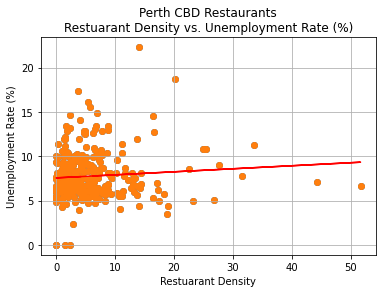

In [50]:
# Linear regression
plt.scatter(summary_df["Restuarant Density"], summary_df["Unemployment Rate (%)"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Restuarant Density"], summary_df["Unemployment Rate (%)"])
regress_values = summary_df['Restuarant Density'] * slope + intercept

# Create the plot
plt.scatter(summary_df["Restuarant Density"], summary_df["Unemployment Rate (%)"])
plt.plot(summary_df["Restuarant Density"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nRestuarant Density vs. Unemployment Rate (%)")
plt.xlabel("Restuarant Density")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Restuarant Density vs Unemployment Rate (%).png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.3.


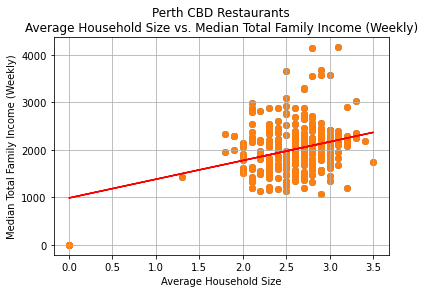

In [52]:
# Linear regression
plt.scatter(summary_df["Average Household Size"], summary_df["Median Total Family Income (Weekly)"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Average Household Size"], summary_df["Median Total Family Income (Weekly)"])
regress_values = summary_df['Average Household Size'] * slope + intercept

# Create the plot
plt.scatter(summary_df["Average Household Size"], summary_df["Median Total Family Income (Weekly)"])
plt.plot(summary_df["Average Household Size"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nAverage Household Size vs. Median Total Family Income (Weekly)")
plt.xlabel("Average Household Size")
plt.ylabel("Median Total Family Income (Weekly)")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Average Household Size vs Median Total Family Income (Weekly).png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

The r-value is: 0.02.


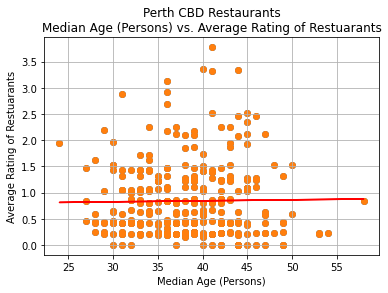

In [54]:
# Linear regression
plt.scatter(summary_df["Median Age (Persons)"], summary_df["Average Rating of Restuarants"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Median Age (Persons)"], summary_df["Average Rating of Restuarants"])
regress_values = summary_df['Median Age (Persons)'] * slope + intercept

# Create the plot
plt.scatter(summary_df["Median Age (Persons)"], summary_df["Average Rating of Restuarants"])
plt.plot(summary_df["Median Age (Persons)"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nMedian Age (Persons) vs. Average Rating of Restuarants")
plt.xlabel("Median Age (Persons)")
plt.ylabel("Average Rating of Restuarants")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Median Age (Persons) vs Average Rating of Restuarants.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()

In [49]:
# Check the list of Column
list(summary_df.columns.values)

['Postcode',
 'Suburb',
 'Suburb sqkm',
 'Median House Price',
 'Median Age (Persons)',
 'Median Mortgage Repayments (Monthly)',
 'Median Total Personal Income (Weekly)',
 'Median Rent (Weekly)',
 'Median Total Family Income (Weekly)',
 'Average Number of Persons per Bedroom',
 'Median Total Household Income (Weekly)',
 'Average Household Size',
 'People (0-14 year)',
 'People (15-24 year)',
 'People (25-34 year)',
 'People (35-44 year)',
 'People (45-54 year)',
 'People (55-64 year)',
 'People (65-74 year)',
 'People (75-84 year)',
 'People (85 and over year)',
 'Total Number of People',
 'Unemployment Rate (%)',
 'Number of Restuarants',
 'Minimum Rating',
 'Maximum Rating',
 'Average Rating of Restuarants',
 'Total Number of Reviews',
 'Average Number of Reviews',
 'Minimum Price Level',
 'Maximum Price Level',
 'Average Price Level',
 'Restuarant Density']

The r-value is: -0.27.


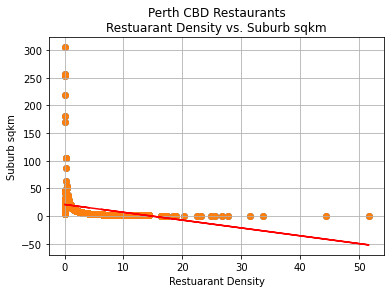

In [55]:
# Linear regression
plt.scatter(summary_df["Restuarant Density"], summary_df["Suburb sqkm"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(summary_df["Restuarant Density"], summary_df["Suburb sqkm"])
regress_values = summary_df['Restuarant Density'] * slope + intercept

# Create the plot
plt.scatter(summary_df["Restuarant Density"], summary_df["Suburb sqkm"])
plt.plot(summary_df["Restuarant Density"], regress_values, "r-")
# plt.annotate(line_eq,(5,25),fontsize=13,color="red")
rvalue_round = round(rvalue,2)

# Format Axes
plt.title("Perth CBD Restaurants\nRestuarant Density vs. Suburb sqkm")
plt.xlabel("Restuarant Density")
plt.ylabel("Suburb sqkm")
plt.grid(True)

# Save figure
plt.savefig("../Outputs/Restuarant Density vs Suburb sqkm.png")


# Plot
print(f"The r-value is: {rvalue_round}.")
plt.show()